# Linear Regression and Confidence Intervals

In [21]:
#simulate a random set of (x,y) points with 
import numpy as np

#will simulate n many points
n = 45
# true values are slope = 4, intercept = 3, with random error added as well, drawn from N(0,1)
b = 3
m = 4
sigma2 = 1.5
flat = 2
X = flat* np.random.rand(n, 1) #rand is flat, between [0,flat]
y = m * X + b + (np.sqrt(sigma2)*np.random.randn(n, 1)) #randn is from a standard normal dist N(0,1)

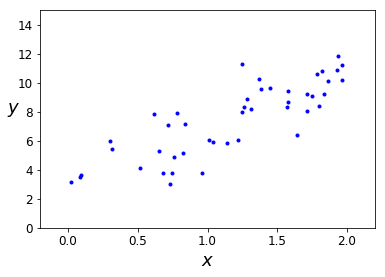

In [22]:
# To plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#plot the data
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-0.2, 2.2, 0, 15])
plt.show()

## Calculate the Variance of Y

Variance is defined as $V[Y] = E[(Y-E[Y])^2]$, where $E$ is the expectation value. 

It can also be written as $V[Y] = E[Y^2] + E[Y]^2$.

In a loose sense, the variance gives an idea of how much uncertainty there is around a random variable. The variance is a function of the probability distribution, but because in a real experiment we wouldn't know what the probability distribution of Y is (or maybe it's not easy to formulate) we can calculate the sample variance instead as an estimate:

$$ \hat{V}[Y] = \frac{1}{N-1}\sum_i(y_i-\bar{y})^2)  \qquad \bar{y} = \frac{1}{N}\sum_i y_i $$

It is $N-1$ because there is one less degree of freedom because $\bar{y}$ is derived from the sample measurements as well. To ge the real variance of Y requires doing error propagation on the known formula

$$ V[mX + b + \epsilon] = m^2 V[X] + V[\epsilon] + 2m\,Cov[X, \epsilon] $$

As we have it, b is a constant, so has variance 0, and the errors between $\epsilon$ and $X$ are uncorrelated, and $\epsilon$ comes from a normal distribution of $N(0,1)$ and $X$ comes a flat uniform distribution from a to b. So 

$$ V[Y] = m^2 \frac{1}{12}(b-a)^2 + \sigma^2 $$

In [23]:
# The real variance of Y
y_var = (m**2)*(1./12.)*(flat**2)+sigma2
# Our sample variance of Y
y_samp_mean = sum(y)/len(y)
y_samp_var = np.dot(np.transpose(y-y_samp_mean),y-y_samp_mean)/(len(y)-1.)

print('Sample variance: {} \nPopulation variance: {}'.format(y_samp_var[0],y_var))

Sample variance: [6.51295231] 
Population variance: 6.833333333333333


## Use Normal equation to get the best fit line

The Population Mean Square Error is the average square difference between the random variable and the regression function. For any regression function f(X) it is 

$$ MSE[f(X)] = E[(Y-f(X))^2] = E[ E[(Y-f(x))^2|X=x] ] $$

The population MSE is closely related to the variance of Y as defined above. Instead of calculating the average of the fluctuations around $E[Y]$ we are instead calculating the averge fluctuations around each point $f(X)$ for each X (and then averaging those together weighted by $X$'s probability distribution). There is an optimal $f(X)$ to minimize the MSE, and that is when $f(x) = E[Y|X=x]$.

We can find the optimal $f(X)$ which gives this minimum MSE by using the Normal formula. The Normal formula gives consistent estimators for the parameters of the regression function $f(X)$ when $f(X)$ is a line. It essentially gives us the minimum of the **Sample** Mean Square Error (not the minimum of the population MSE). The Sample Mean Square Error is defined as:

$$ \hat{MSE} = \frac{1}{n} \sum_i{(y_i - b_{pred} - m_{pred}x_i )^2} = \frac{1}{n}*(y-X\hat{\theta})^T(y-X\hat{\theta})$$

And the Normal Formula for getting $b_{pred}$ and $m_{pred}$ is

$$ \hat{\theta} = [b_{pred},m_{pred}] = \left( X^T * X \right)^{-1}*X^T*y$$

X is the "design matrix" which encodes our data points for the $N$ events in our sample. You have to add a column of 1's to design matrix so that you can dot it with the $\theta$ vector of parameters, i.e. $[1 \; x_i] \cdot \begin{bmatrix} b_p \\ m_p \end{bmatrix} = b_p + x_i m_p$.  The normal equation is a linear equation where $ L = \left( X^T * X \right)^{-1}*X^T $ is the linear operator.

$$ [b_{pred},m_{pred}] = L*y $$

If you wanted to recover the exact b and m, in the high N limit, 

$$ \left( X^T * X \right)^{-1}*X^T*y \rightarrow \frac{Cov[X,Y]}{V[X]} = \begin{bmatrix}b \\m \end{bmatrix}$$

In [24]:
#Need to add a column of constant 1 to fit the intercept
#Normal equation says inv(X^T*X)*X^T*y gives the best fit m and b.
X_b = np.c_[np.ones((n, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('population intercept: {}, population slope: {}'.format(b,m))
print('best fit intercept: {:.3f}, best fit slope: {:.3f}'.format(theta_best[0][0],theta_best[1][0]))

#Rather than using the normal equation, let's also use gradient descent
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('gradient intercept: {:.3f}, gradient slope: {:.3f}'.format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))

population intercept: 3, population slope: 4
best fit intercept: 3.053, best fit slope: 3.746
gradient intercept: 3.053, gradient slope: 3.746


## Plot the best fit line

Now that the Normal equation has calculated the $b_{pred}$ and $m_{pred}$ that minimizes the sample MSE, we can plot the regression line over the points in our sample.

In [25]:
#Draw a line between two points, x=0 and x=2
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

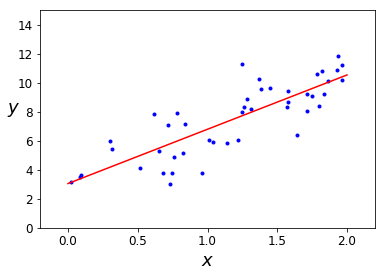

In [26]:
#now plot the line
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-0.2, 2.2, 0, 15])
plt.show()

## Calculate the Confidence interval on the best-fit parameter

So we have our regression estimators, $m_{pred}$ and $b_{pred}$.

Each estimator is a random variable. They were calculated from our N random points ${(x_i,y_i)}$, and so would change if we collected a new sample of points. That means these estimators have their own probability distributions associated with them.

### Distributions of $m_p$ and $b_p$

We want to know the expectation value and variance of $m_{p}$ and $b_{p}$, our best fit values. The estimates of these two parameters are often correlated, which means that we model their probability distribution as a 2D distribution. By the central limit theorem, if our sample size N is big enough, the shapes of the distributions should be a multivariate Gaussian of 2 dimensions, the means of each parameter should approach their real parameters, and their variances and covariances should also approach $\frac{\Sigma^2}{N}$ (where $\Sigma$ is for the full covariance matrix). If the sample size is small-ish, it may be better to estimate with a Student's t distribution.

The expectation values will be the real parameters 

$E(m_p) = m $ and $E(b_p) = b $

The variance can be gotten from the normal equation using standard error propagation.

$$ V[\begin{bmatrix} b_p \\m_p \end{bmatrix}] = V[\left( X^T * X \right)^{-1}*X^T*Y] = V[L*Y] $$

We could try to do the exact propagation of errors using the math fact that $V[AB] = Cov[A^2,B^2] + E[A^2]E[B^2] - (E[AB])^2$, and the fact that Y can be written as $Y = mX + b + \epsilon$... but we are going to skip all of that derivation here and also assume that $\epsilon$ is uncorrelated with $X$ and that  $V[\epsilon]$ is a constant $\sigma^2$.

$$ V[L*Y] = \sigma^2*L*L^T = (X^T*\frac{1}{\sigma^2}*X)^{-1}  = \sigma^2(X^T*X)^{-1} $$ 

This is also know as the inverse of the Hessian, where $H = X^T*\frac{1}{\sigma^2}*X$. 

So now let's calculate the sample Variance for the estimators. If $X = \begin{bmatrix}1 & x_1\\1 & x_2 \\ .. & ..\end{bmatrix} $, then $X^T*X = \begin{bmatrix} n & \sum_i{x_i}\\ \sum_i{x_i} & \sum_i{x_i^2} \end{bmatrix}$ 

and using the math fact that $ \begin{bmatrix}a & b \\ c & d \end{bmatrix}^{-1} = \frac{1}{ad-bc} \begin{bmatrix}d & -b \\ -c & a  \end{bmatrix} $

$ \hat{V}[\begin{bmatrix} b_p \\m_p \end{bmatrix}] = \sigma^2 (X^T*X)^{-1} = \frac{\sigma^2}{n \hat{V}(x)} \begin{bmatrix}\bar{x^2} & -\bar{x}\\ -\bar{x} & 1 \end{bmatrix} $, where we have used the sample Variance of x $\hat{V}(x) = \bar{x^2} - \bar{x}^2$

So finally, 

$\hat{\sigma}_{b_p} = \sqrt{\hat{V}_{00}} = \sigma\sqrt{\frac{\bar{x^2}}{n*\hat{V}[x]}}$ 

and 

$\hat{\sigma}_{m_p} = \sqrt{\hat{V}_{11}} = \sigma\frac{1}{\sqrt{n*\hat{V}[x]}}$

We are not done just yet since we don't know what $\sigma^2$ is exactly, so we have to come up with an estimator for that too. In many toy problems, $\sigma^2$ is just a given, but here we will calculate it.

The estimator for $\sigma^2$ is actually going to be very close to our sample MSE($f(X)$), but not exactly that. When we plug in the $b_p$ and $m_p$ predictions into the regression function, since they were both calculated from the n measurements in our sample, we have to reduce the degrees of freedom by two for an unbiased measurement. 

$$ \hat{MSE} = \frac{1}{n-2} \sum_i{(y_i - b_{pred} - m_{pred}x_i )^2} $$


So our estimate $\hat{\sigma}^2 = \hat{MSE}_{n-2}$

### Calculate Mean Square Error, and  get estimate of $\sigma^2$

In [27]:
import math
resids= X_b.dot(theta_best) - y
sample_MSE = ((1.0/n) * sum(np.power(resids,2)))
print('sample MSE: {:.3f}'.format(sample_MSE[0]))
# To get an estimator for sigma^2, we should take the MSE but use 1/(m-2)
# n-2 comes from the fact that since there are two parameters being esimated, m and b, 
# there are two linear constraints that reduce the degrees of freedom
sample_MSE_n2 = (1.0/(n-2.0)) * sum(np.power(resids,2))
print('sample MSE w/ N-2 (predicted sigma^2): {:.3f}'.format(sample_MSE_n2[0]))

#get the score from gradient descent
from sklearn.metrics import mean_squared_error
reg_score = mean_squared_error(X_b.dot(theta_best), y)
print('MSE from sklearn: {:.3f}'.format(reg_score))
print('')
print('population sigma^2: {}'.format(sigma2))

sample MSE: 2.005
sample MSE w/ N-2 (predicted sigma^2): 2.098
MSE from sklearn: 2.005

population sigma^2: 1.5


Now we'll use $\hat{\sigma}^2$ to calculate the standard error of $b_p$ and $m_p$, by just subsituting in $\hat{\sigma}^2$ for $\sigma^2$ in our variance matrix.

With total best-fit V being

$\hat{\sigma}_{b_p} = \sqrt{\hat{V_{00}}} = \hat{\sigma}\sqrt{\frac{\bar{x^2}}{n*\hat{V}[x]}}$  

and 

$\hat{\sigma}_{m_p} = \sqrt{\hat{V_{11}}} = \hat{\sigma}\frac{1}{\sqrt{n*\hat{V}[x]}}$



And we'll use this to create our confidence intervals.


In [28]:
s2 = sample_MSE_n2
s = math.sqrt(sample_MSE_n2)
#calculate the estimate for the Variance of our parameters b and m
V_best = np.linalg.inv(X_b.T.dot(X_b))*s2

### Creating the confidence Intervals

We need to first set our significance level. We know the mean and variance of our best fit parameters, now we just need to know what distribution (e.g. Gaussian, Student's t, etc) to apply these to.

When the sample size is large enough, by the central limit theorem, one can use a standard Gaussian distribution. You can get the Z-score from the confidence level by using the percentile function of the gaussian. 

In [29]:
#set the confidence level at 68%, and 95%
alpha1 = 0.32
alpha2 = 0.05

In [30]:
from scipy.stats import norm
# The Z-score for the given confidence level, taken from a Gaussian
sig1 = round(norm.ppf(1.0-(alpha1/2.0)),2) #percentile function
sig2 = round(norm.ppf(1.0-(alpha2/2.0)),2) #percentile function
print('For 68% level, Z-score is:',sig1)
print('For 95% level, Z-score is:',sig2)

For 68% level, Z-score is: 0.99
For 95% level, Z-score is: 1.96


So the 95% confidence interval for a Gaussian with a known and $\sigma^2$ would be

$$\left( m_{pred} - 1.96*\sigma_{m_p},m_{pred} + 1.96*\sigma_{m_p} \right)$$

Because we estimated $\sigma^2$ from the sample, that means $\hat{\sigma}^2$ has its own probability distribution with its own variance, which will have the effect of making the tails of our distribution for our estimators bigger. To take this uncertainity from $\hat{\sigma}^2$ into account, we will use a Student's t distribution instead. Using the student's t distribution will make our confidence interval a bit wider.

We can calculate the 95% confidence points by using n-2 as our degrees of freedom for student's t.

$$\left( m_{pred} - t(.975,n-2)*SE_{m_p},m_{pred} + t(.975,n-2)*SE_{m_p} \right)$$

Student's t is distributed as $t(v) = \frac{N(0,1)}{\sqrt{\chi^2(v)/v}}$, where $v$ is the degree of freedom.

In [31]:
from scipy.stats import t
t1 = t.ppf(1.0-(alpha1/2.0),n-2) #percentile function
t2 = t.ppf(1.0-(alpha2/2.0),n-2) #percentile function
print('For 68% level, T-score is:',round(t1,2))
print('For 95% level, T-score is:',round(t2,2))

For 68% level, T-score is: 1.01
For 95% level, T-score is: 2.02


### intercept confidence interval calculation

In [32]:
#calculate the confidence interval on m, using student's t and estimated sigma_m_p
SE_b_p = math.sqrt(V_best[0][0])
b_pred = theta_best[0]
interval_b1 = np.array([b_pred - t1*SE_b_p,b_pred + t1*SE_b_p])
interval_b2 = np.array([b_pred - t2*SE_b_p,b_pred + t2*SE_b_p])
print('population intercept:',b)
print('central:',b_pred)
print('confidence interval using Students t')
print('lower 68%:',interval_b1[0],'upper 68%',interval_b1[1],'In interval?',(b >=interval_b1[0] and b <=interval_b1[1]))
print('lower 95%:',interval_b2[0],'upper 95%',interval_b2[1],'In interval?',(b >=interval_b2[0] and b <=interval_b2[1]))

population intercept: 3
central: [3.05260819]
confidence interval using Students t
lower 68%: [2.54463908] upper 68% [3.5605773] In interval? [ True]
lower 95%: [2.03439285] upper 95% [4.07082353] In interval? [ True]


### slope confidence interval calculation

In [33]:
#calculate the confidence interval on m, using student's t and estimated sigma_m_p
SE_m_p = math.sqrt(V_best[1][1])
m_pred = theta_best[1]
interval_m1 = np.array([m_pred - t1*SE_m_p,m_pred + t1*SE_m_p])
interval_m2 = np.array([m_pred - t2*SE_m_p,m_pred + t2*SE_m_p])
print('population slope:',m)
print('central:',m_pred)
print('confidence interval using Students t')
print('lower 68%:',interval_m1[0],'upper 68%',interval_m1[1],'In interval?',(m >=interval_m1[0] and m <=interval_m1[1]))
print('lower 95%:',interval_m2[0],'upper 95%',interval_m2[1],'In interval?',(m >=interval_m2[0] and m <=interval_m2[1]))

population slope: 4
central: [3.7460822]
confidence interval using Students t
lower 68%: [3.35643717] upper 68% [4.13572723] In interval? [ True]
lower 95%: [2.96504545] upper 95% [4.52711895] In interval? [ True]


## Calculate confidence interval on regression line

Now we've found the confidence interval on the fit value of the slope and intercept.

But what if we want to find the confidence interval on the predicted y, at every point x?

$y_{p} = b_{p} + m_{p}x$

So to find the expectation value and Variance of $y_{p}$ is just a matter of doing error propagation.

$E[aA+bB] = aE[A] + bE[B]$ 

and 

$V[aA+bB] = a^2*V[A]+b^2*V[B]+2ab*Cov[A,B]$

so

$E[y_{p}] = E[b_{p}] + xE[m_{p}] = b + mx $

and 

$V[E[Y|X=x]] = V[y_{p}|X=x] = V[b_{p}] + x^2 V[m_{p}] + 2x Cov[b_{p}, m_{p}] = V_{00} + x^2V_{11} + 2xV_{01}$

$V[y_{p}|X=x] = \frac{\sigma^2}{n*V[x]}\left(\bar{x^2} + x^2 - 2x\bar{x}\right) $

Again, since we don't know $\sigma^2$, we'll use $\hat{\sigma}^2$ and get the standard error for $y_{p}$

$\hat{\sigma}_{y_p|x} = \sqrt{\hat{V_{00}}+x^2\hat{V_{11}}+2x\hat{V_{01}}} $



In [34]:
def SE2_y_p(x):
    return V_best[0][0]+(x**2)*V_best[1][1]+2*x*V_best[0][1]

X_new = np.linspace(0, 2, 201).reshape(201, 1)
X_new_b = np.c_[np.ones((201, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_mu_upper = np.array(list(map(lambda x,y: y + t2*math.sqrt(SE2_y_p(x)), X_new, y_predict)))
y_mu_lower = np.array(list(map(lambda x,y: y - t2*math.sqrt(SE2_y_p(x)), X_new, y_predict)))

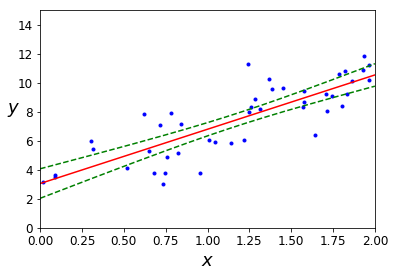

In [35]:
#now plot the confidence bands
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.plot(X_new, y_mu_upper, "g--")
plt.plot(X_new, y_mu_lower, "g--")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [36]:
print('X:',X_new[100],'y pred',y_predict[100],'y down:',y_mu_lower[100],'y up:',y_mu_upper[100])

X: [1.] y pred [6.79869039] y down: [6.34144197] y up: [7.2559388]


The red line is a very good fit of the true slope (4) and offset (3), so the green bars are very small. 

The green bars are a prediction of the mean response at $x$, not the 95% of where a new prediction will land.

The claim is: 95% of the time, CI covers the most optimal regression $\mu = mx + b$ at that point $x$.

## Confidence Interval of an individual observations, y

If you want to draw the 95% bands of where an individual prediction will land, rather than the mean of the predictions at a point x, that is a different interval to calculate.

For that, you want to predict, $ y_p = b_p + m_p x + e $

What's different is now you want to take into account the random noise fluctuations, $e$, as well. $e$ is a gaussian centered at 0 with variance $\sigma^2$ (but we don't know the true value of $\sigma$).

the $y_p$ random variable now has an extra term. But this term is independet of the other two. We can make a new covariance matrix, which is the original 2x2 matrix, but with a third row which is just $\sigma^2$ on the diagonal and no covariant terms.

$V[Y|X=x] = V[(b_p+m_px) + e] = V[b_p+m_px] + Var[e] + 2Cov[b_p+m_px, e] = \frac{\sigma^2}{n*\hat{V}[x]}\left(\bar{x^2} + x^2 - 2x\bar{x}\right) + \sigma^2 + 0$

and

$ E(y) = E(b) + xE(m) + E(e) = b + mx $

So since we don't know $\sigma^2$ exactly, we'll use $\hat{\sigma}^2$ and get the standard error for $y(x)$

$\hat{\sigma}_{y|x} = \sqrt{(\hat{V_{00}}+ x^2\hat{V_{11}}+2x\hat{V_{01}}) + \hat{\sigma}^2} $


In [37]:
def SE2_new_y(x):
    return SE2_y_p(x) + s2

y_new_upper = np.array(list(map(lambda x,y: y + t2*math.sqrt(SE2_new_y(x)), X_new, y_predict)))
y_new_lower = np.array(list(map(lambda x,y: y - t2*math.sqrt(SE2_new_y(x)), X_new, y_predict)))

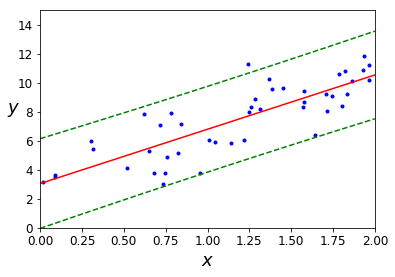

In [38]:
#now plot the confidence intervals
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.plot(X_new, y_new_upper, "g--")
plt.plot(X_new, y_new_lower, "g--")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [39]:
print('X:',X_new[100],'y pred',y_predict[100],'y down:',y_new_lower[100],'y up:',y_new_upper[100])

X: [1.] y pred [6.79869039] y down: [3.84171078] y up: [9.75566999]


## Coverage of the confidence interval

The claim here is that 95% of the time, the predicted interval will cover a new y that gets dropped in the plot.

In [40]:
X_coarse = np.round(X,2)

def in_ci(x,y):
    bi = int(x*100)
    if y >= y_new_lower[bi] and y <= y_new_upper[bi]:
        return 1
    else:
        return 0

y_test = np.array(list(map(lambda x,y: in_ci(x,y), X_coarse, y)))
coverage = sum(y_test)/len(y_test)
round(coverage,2)

0.98